## Import Dependancies

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KDTree
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from wordcloud import WordCloud, STOPWORDS
#from sklearn.metrics import confusion_matrix, classification_report

import mglearn




In [2]:
# File to Load (Remember to Change These)
data = "../Resources/FINAL_CLEAN_FILE.csv"

# read to dataframe
data_df = pd.read_csv(data)
data_df.head()


,VAERS_ID,SYMPTOM,ASSIGNED_GROUP,SEVERITY_LEVEL,DIED,L_THREAT,HOSPITAL,AGE_YRS,AGE_GROUP,OTHER_MEDS,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,916600,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,33.0,26-35,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,917168,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,64.0,56-65,1.0,...,1.0,0,0,0,0,1,0,0,0,0
2,918386,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,62.0,56-65,1.0,...,1.0,0,0,0,0,1,0,0,0,0
3,918393,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,62.0,56-65,1.0,...,1.0,0,0,0,0,1,0,0,0,0
4,918479,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,37.0,36-45,1.0,...,1.0,0,0,1,0,0,0,0,0,0


In [3]:
severity = data_df['SEVERITY_LEVEL'].unique()
severity

array(['MILD', 'MODERATE', 'SEVERE'], dtype=object)

In [4]:
data_df.columns

Index(['VAERS_ID', 'SYMPTOM', 'ASSIGNED_GROUP', 'SEVERITY_LEVEL', 'DIED',
       'L_THREAT', 'HOSPITAL', 'AGE_YRS', 'AGE_GROUP', 'OTHER_MEDS', 'CUR_ILL',
       'HISTORY', 'PRIOR_VAX', 'ALLERGIES', 'F', 'M', 'JANSSEN', 'MODERNA',
       'PFIZER', 'VAX_DOSE_SERIES_1', 'VAX_DOSE_SERIES_2', 'VAX_SITE_LA',
       'VAX_SITE_RA', '18-25', '26-35', '36-45', '46-55', '56-65', '66-75',
       '76-85', '86-95', '96 +'],
      dtype='object')

## Prep Data For Model

In [5]:
# create train data
X = data_df.drop(['VAERS_ID', 'SYMPTOM','ASSIGNED_GROUP','SEVERITY_LEVEL','HOSPITAL','AGE_YRS', 'AGE_GROUP'], axis=1)
X


,DIED,L_THREAT,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES,F,M,JANSSEN,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,1,0,0,0
26478,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,0,0,0,0,1,0,0
26479,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0,0,0,0,0,0,1,0,0
26480,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0,0,0,0,0,0,1,0,0


In [6]:
# convert the serverity labels to numbers and create the target data
y = LabelEncoder().fit_transform(data_df['SEVERITY_LEVEL'])
y


array([0, 0, 0, ..., 2, 1, 1])

In [7]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
X_train

,DIED,L_THREAT,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES,F,M,JANSSEN,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0,0,0,0,1,0,0,0,0
9280,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1,0,0,0,0,0,0,0,0
1067,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
18597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0,0,0,1,0,0,0,0,0
17354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20691,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,1,0,0,0
5699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,0,0,0,1,0,0,0,0
10742,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0,1,0,0,0,0,0,0,0
16921,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0,0,0,1,0,0,0,0,0


In [8]:
# Scaling the train data with StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.14536542, -0.19686348, -1.26664113, ..., -0.23518821,
        -0.15121693, -0.04435663],
       [-0.14536542, -0.19686348,  0.7894896 , ..., -0.23518821,
        -0.15121693, -0.04435663],
       [-0.14536542, -0.19686348, -1.26664113, ..., -0.23518821,
        -0.15121693, -0.04435663],
       ...,
       [-0.14536542, -0.19686348, -1.26664113, ..., -0.23518821,
        -0.15121693, -0.04435663],
       [-0.14536542, -0.19686348,  0.7894896 , ..., -0.23518821,
        -0.15121693, -0.04435663],
       [-0.14536542, -0.19686348,  0.7894896 , ..., -0.23518821,
        -0.15121693, -0.04435663]])

## Testing KNN to Determine Best k value

k: 1, Train/Test Score: 0.882/0.837
k: 3, Train/Test Score: 0.900/0.885
k: 5, Train/Test Score: 0.904/0.890
k: 7, Train/Test Score: 0.904/0.894
k: 9, Train/Test Score: 0.903/0.893
k: 11, Train/Test Score: 0.903/0.895
k: 13, Train/Test Score: 0.902/0.895
k: 15, Train/Test Score: 0.901/0.896
k: 17, Train/Test Score: 0.902/0.896
k: 19, Train/Test Score: 0.901/0.897


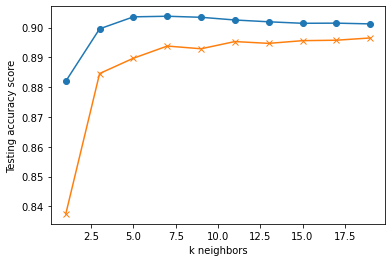

In [9]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()


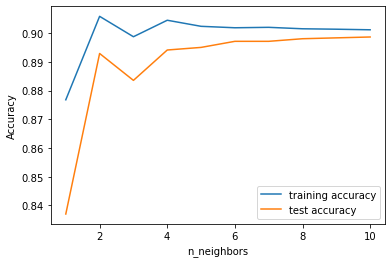

In [10]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

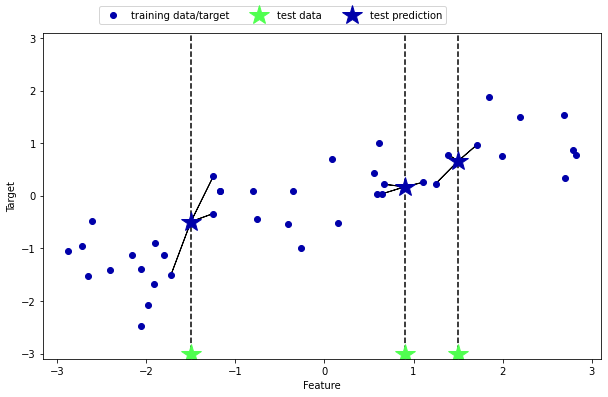

In [11]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

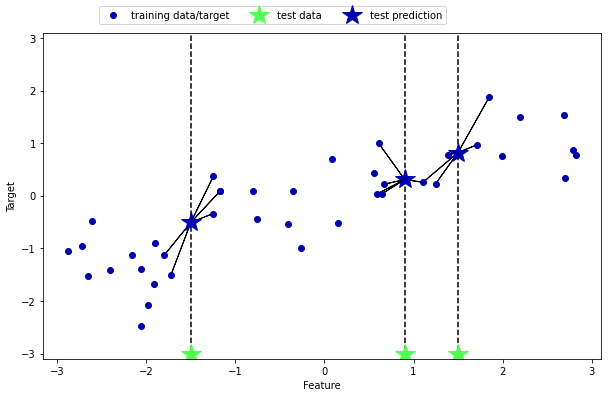

In [12]:
mglearn.plots.plot_knn_regression(n_neighbors=5)



 ## SVM


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import mglearn


In [38]:
from sklearn.datasets import make_blobs


Text(0, 0.5, 'Feature 1')

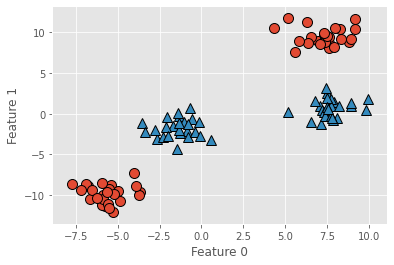

In [42]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\Users\D\anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

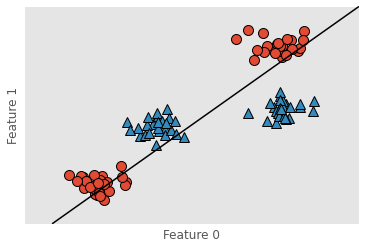

In [16]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5, 0, 'feature1 ** 2')

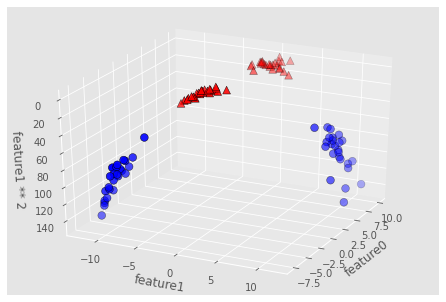

In [17]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

C:\Users\D\anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

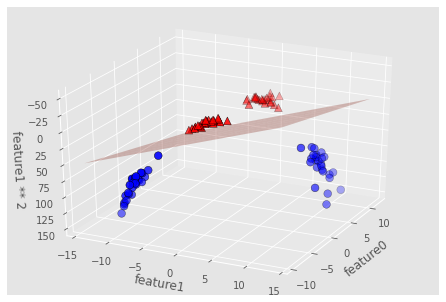

In [18]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'Feature 1')

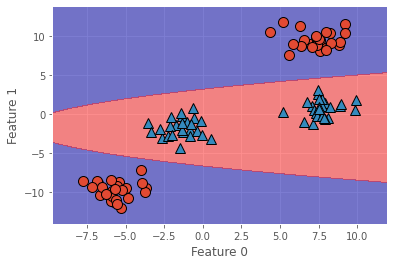

In [19]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

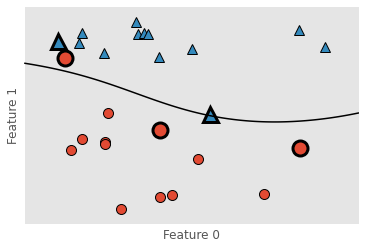

In [20]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

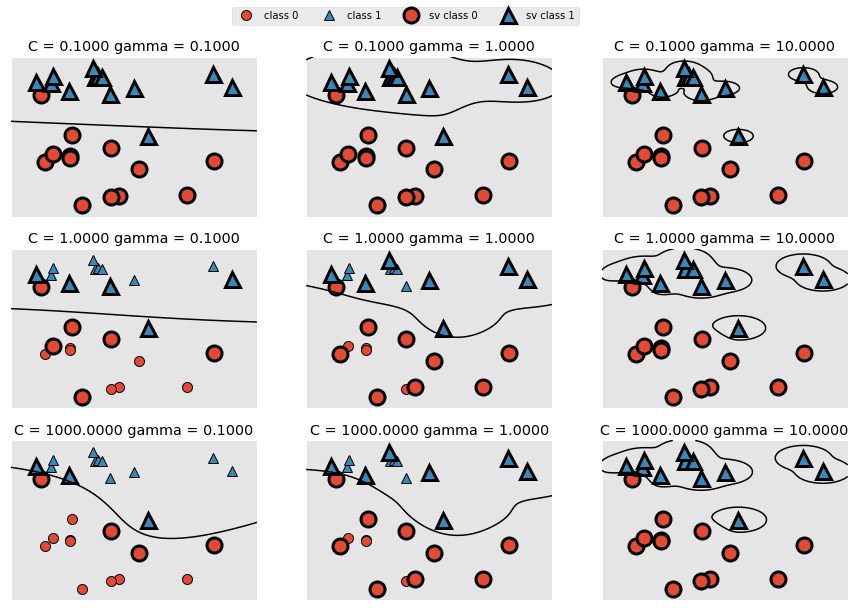

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.95
Accuracy on test set: 0.86


Text(0, 0.5, 'Feature magnitude')

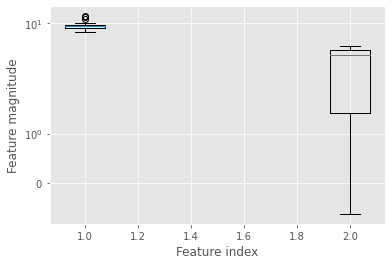

In [23]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [24]:
# fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# # create 1,000 data points, evenly spaced between -3 and 3
# line = np.linspace(-3, 3).reshape(-1, 1)
# #1000).reshape(-1, 1)
# for n_neighbors, ax in zip([1, 3, 9], axes):
#     # make predictions using 1, 3, or 9 neighbors
#     reg = KNeighborsRegressor(n_neighbors=n_neighbors)
#     reg.fit(X_train, y_train)
#     ax.plot(line, reg.predict(line))
#     ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
#     ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

#     ax.set_title(
#         "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
#             n_neighbors, reg.score(X_train, y_train),
#             reg.score(X_test, y_test)))
#     ax.set_xlabel("Feature")
#     ax.set_ylabel("Target")
# axes[0].legend(["Model predictions", "Training data/target",
#                 "Test data/target"], loc="best")

In [25]:
# from sklearn.neighbors import KNeighborsRegressor

# # X, y = mglearn.datasets.make_wave(n_samples=40)

# # split the wave dataset into a training and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# # instantiate the model and set the number of neighbors to consider to 3
# reg = KNeighborsRegressor(n_neighbors=5)
# # fit the model using the training data and training targets
# reg.fit(X_train, y_train)

In [26]:
# print("Test set predictions:\n", reg.predict(X_test))

In [27]:
# print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Based on the scores above, we will move forward with 5 neighbors for our model. This was run on 3 random states (33, 42, 7) and all began to stabilize at k=5. 

## Create KNN Model 

In [28]:
# # Note that k: 5 provides the best accuracy where the classifier starts to stablize
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train_scaled, y_train)
# print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))


In [29]:
# X.columns


In [30]:
# # Sample Prediction 1
# sample_user1 = [[0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0]]
# predicted_symptoms = knn.predict(sample_user1)
# print(severity[predicted_symptoms])


In [31]:
# # 5 people closest to user 1
# tree = KDTree(X)
# dist, ind = tree.query(sample_user1, k=100)

# #convery ndarry to list 
# like_users = ind[0].tolist()
# print(like_users)  # indices of 5 closest neighbors


In [32]:
# # save nearest 50 neighbors symptoms as list for wordcloud
# predicted_symptoms = data_df['SYMPTOM'].iloc[like_users].tolist()
# predicted_symptoms[:5]


In [33]:
# #convert list to string and generate
# unique_string=(" ").join(predicted_symptoms)

# #create circle mask
# x, y = np.ogrid[:300, :300]
# mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
# mask = 255 * mask.astype(int)

# wordcloud = WordCloud(width = 1000, height = 500, mask=mask).generate(unique_string)
# plt.figure(figsize=(15,8))
# plt.imshow(wordcloud)
# plt.axis("off")
# #plt.savefig("your_file_name"+".png", bbox_inches='tight')
# plt.show()
# plt.close()


In [34]:
# # Sample Prediction 2
# sample_user2 = [[0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]]
# predicted_symptoms = knn.predict(sample_user2)
# print(severity[predicted_symptoms])


In [35]:
# merge2_df.head()


In [36]:
# merge2_df.to_csv('training_data.csv')


In [37]:
# tree = KDTree(X)
# ind = tree.query([[1.25, 1.35]], k=5)
# print(ind)  # indices of 5 closest neighbors


# print('People like you reported the following symptoms:')
